<a href="https://colab.research.google.com/github/teerasitk/01205415/blob/main/CorrelationAndCausation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance

In [ ]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

# Correlation Among Stocks

In [ ]:
def getPeriodReturn(series: pd.Series,
                    period:str = "daily",
                    type:str="simple")->pd.Series:
    """
    Compute either simple and log return for a given time period
      series: time-series pandas object containing a price of a given assets
      perid: time period (daily, weekly, monthly or yearly). Default daily
      type: either "simple" or "log" return
    Return:
      time-series log or simple return

    """

    resamples  = {"daily":"1d", "weekly":"1w",
                  "monthly":"1m","yearly":"1y"}
    sdata = None
    if period not in resamples.keys():
      raise("Unrecognize period. It must be either 'daily', 'weekly', 'monthly' or 'yearly'")
    else:
      sdata = series.resample(resamples[period]).last()
      ret = sdata.pct_change(1).dropna()
      if type == "log":
        ret = np.log(1 + ret)
      return ret


## consider 5 stocks

In [ ]:
names =["ADVANC", "INTUCH", "KBANK", "KCE", "DELTA"]

## Daily close price correlation

In [ ]:
names =["ADVANC", "INTUCH", "KBANK", "KCE", "DELTA"]
ret_set5 = dict()
period = "daily" # daily return
for name in names:
  df = yf.download(name + ".BK", start="2022-01-01", end="2022-12-31")
  ret_set5[name] = getPeriodReturn(df['Adj Close'], period=period, type="log")
ret_set5["Date"] = ret_set5[name].index
ret_set5 = pd.DataFrame(ret_set5)
ret_set5 = ret_set5.set_index("Date")
ret_set5.corr()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,ADVANC,INTUCH,KBANK,KCE,DELTA
ADVANC,1.000000,0.553589,0.322449,0.172841,0.129627
INTUCH,0.553589,1.000000,0.142507,0.121750,0.114040
KBANK,0.322449,0.142507,1.000000,0.237634,0.118349
KCE,0.172841,0.121750,0.237634,1.000000,0.436421
DELTA,0.129627,0.114040,0.118349,0.436421,1.000000


## monthly close price correlations

In [ ]:
names =["ADVANC", "INTUCH", "KBANK", "KCE", "DELTA"]
ret_set5 = dict()
period = "monthly" # monthly return
for name in names:
  df = yf.download(name + ".BK", start="2022-01-01", end="2022-12-31")
  ret_set5[name] = getPeriodReturn(df['Adj Close'], period=period, type="log")
ret_set5["Date"] = ret_set5[name].index
ret_set5 = pd.DataFrame(ret_set5)
ret_set5 = ret_set5.set_index("Date")
ret_set5.corr()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,ADVANC,INTUCH,KBANK,KCE,DELTA
ADVANC,1.000000,0.651771,0.095037,0.066259,0.579450
INTUCH,0.651771,1.000000,0.261405,0.188691,0.463994
KBANK,0.095037,0.261405,1.000000,-0.303648,-0.009796
KCE,0.066259,0.188691,-0.303648,1.000000,-0.154663
DELTA,0.579450,0.463994,-0.009796,-0.154663,1.000000


# Autocorrelation function (ACF)

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf # main library to plot ACF

[*********************100%%**********************]  1 of 1 completed


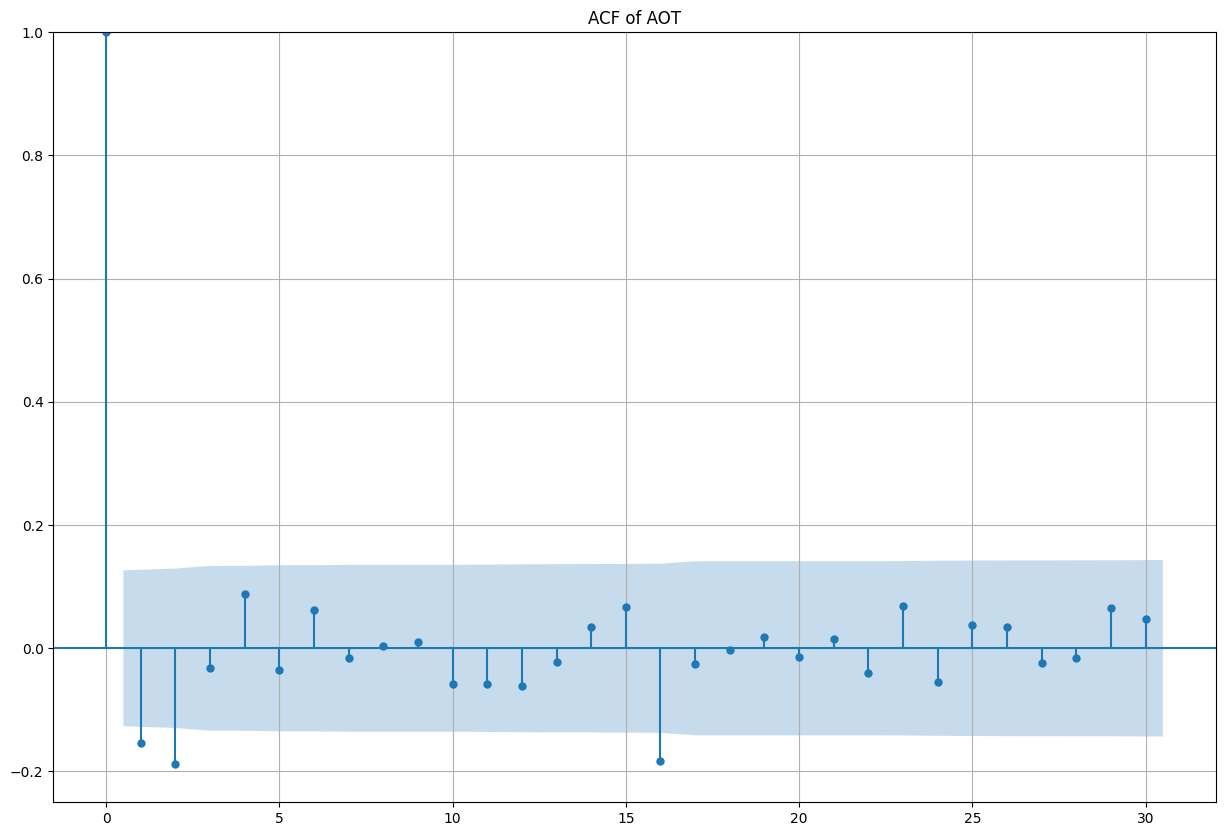

In [ ]:
df = yf.download("AOT" + ".BK", start="2022-01-01", end="2022-12-31")
ret = df["Close"].pct_change(1).dropna()
fig, ax = plt.subplots(figsize=(15,10))
plot_acf(ret, lags=30, ax=ax)
ax.set_title("ACF of AOT")
ax.set_ylim(-0.25,1.0)
plt.grid()


## plot ACF of all 6 stocks

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Text(0.5, 0, 'lags')

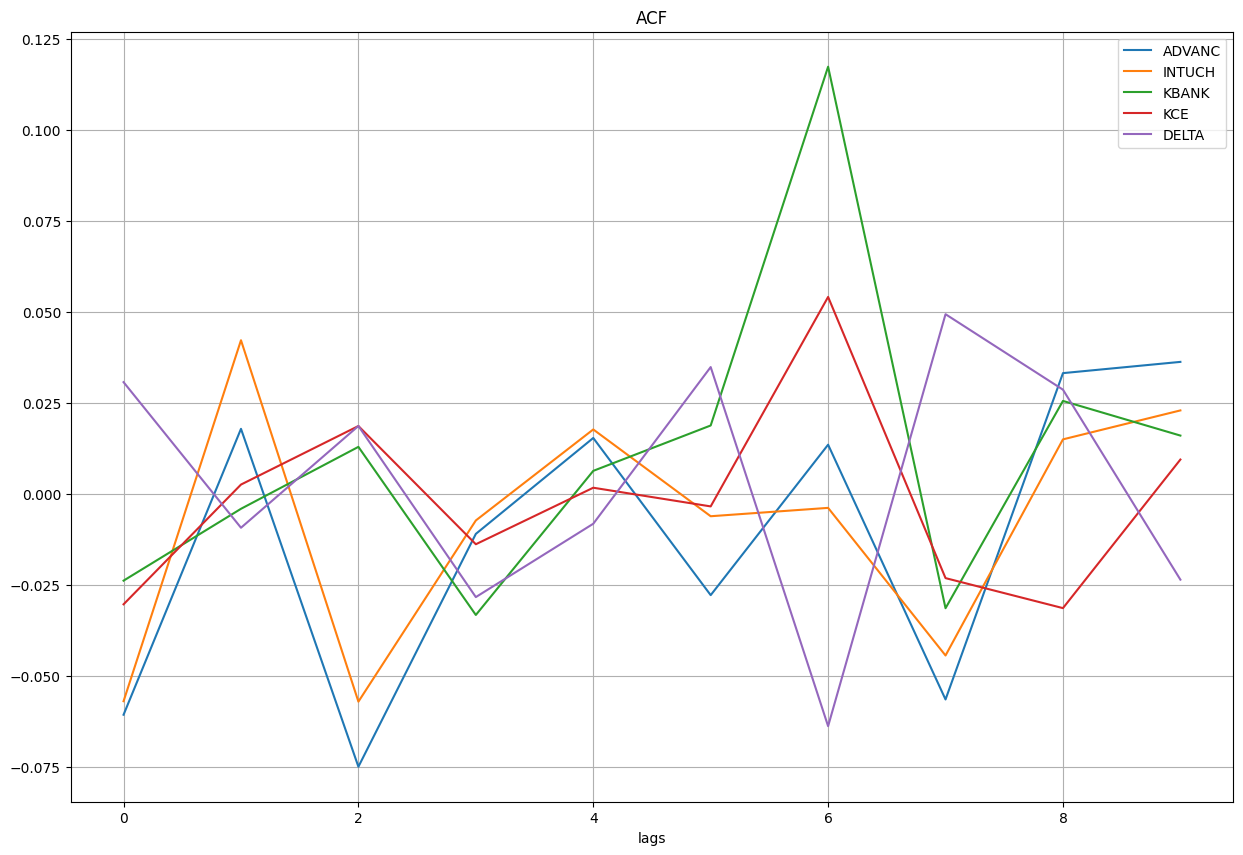

In [ ]:
period = "daily"
acfs = dict()
plt.figure(figsize=(15,10))
for name in names:
  df = yf.download(name + ".BK", start="2016-01-01", end="2021-12-31")
  ret= getPeriodReturn(df['Adj Close'], period=period, type="log")
  acf = [ret.autocorr(lag) for lag in range(1,11)]
  acfs[name] = acf
  plt.plot(acf, label=name)
plt.legend()
plt.grid()
plt.title("ACF")
plt.xlabel("lags")


# Test for auto correlation


*   $H_0$: $\rho(h)=0$ for all $h \neq 0$
*   $H_1$: $\rho(h) \neq 0$ for some $h \neq 0$



In [1]:
from scipy.stats import chi2
alpha = 0.05
chi2.ppf(1.0 - alpha , df = 3)

7.814727903251179

In [ ]:
import statsmodels.api as sm
period="daily"
for name in ["AOT", "ADVANC", "DELTA", "COM7"]:
  df = yf.download(name + ".BK", start="2022-01-01", end="2022-12-31", progress=False)
  ret= getPeriodReturn(df['Adj Close'], period=period, type="log")
  output = sm.stats.acorr_ljungbox(ret, lags=range(1,11))
  q_stat = output["lb_stat"][10]
  p_val = output["lb_pvalue"][10]
  print(f"{name}: Q(h) = {q_stat:0.3f}, p-value: {p_val:0.3f}")

AOT: Q(h) = 24.756, p-value: 0.006
ADVANC: Q(h) = 13.634, p-value: 0.190
DELTA: Q(h) = 7.227, p-value: 0.704
COM7: Q(h) = 12.795, p-value: 0.235


In [ ]:
ret_set5 = dict()
period = "daily"
for name in names:
  df = yf.download(name + ".BK", start="2022-01-01", end="2023-12-31")
  ret_set5[name] = getPeriodReturn(df['Adj Close'], period=period, type="log")
ret_set5["Date"] = ret_set5[name].index
ret_set5 = pd.DataFrame(ret_set5)
ret_set5 = ret_set5.set_index("Date")
ret_set5.corr() # default is linear correlation

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,ADVANC,INTUCH,KBANK,KCE,DELTA
ADVANC,1.000000,0.570963,0.253939,0.173892,0.028482
INTUCH,0.570963,1.000000,0.182315,0.167508,0.026800
KBANK,0.253939,0.182315,1.000000,0.247899,0.081506
KCE,0.173892,0.167508,0.247899,1.000000,0.398739
DELTA,0.028482,0.026800,0.081506,0.398739,1.000000


In [ ]:
ret_set5 = dict()
period = "daily"
for name in names:
  df = yf.download(name + ".BK", start="2022-01-01", end="2023-12-31")
  ret_set5[name] = getPeriodReturn(df['Adj Close'], period=period, type="log")
ret_set5["Date"] = ret_set5[name].index
ret_set5 = pd.DataFrame(ret_set5)
ret_set5 = ret_set5.set_index("Date")
ret_set5.corr("kendall") # all you need to change kendall correlation

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,ADVANC,INTUCH,KBANK,KCE,DELTA
ADVANC,1.000000,0.429389,0.155275,0.178018,0.084764
INTUCH,0.429389,1.000000,0.116764,0.183496,0.113705
KBANK,0.155275,0.116764,1.000000,0.224245,0.089407
KCE,0.178018,0.183496,0.224245,1.000000,0.359305
DELTA,0.084764,0.113705,0.089407,0.359305,1.000000


# Causality

In [ ]:
from statsmodels.tsa.tsatools import lagmat
from statsmodels.tsa.stattools import grangercausalitytests
ret_adv_vs_intuch = ret_set5[["ADVANC", # output
                              "INTUCH"]] # input
# does intuch cause price of advanc to change
gs_res_intuch_cause_adv = grangercausalitytests(ret_adv_vs_intuch, maxlag=2)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1446  , p=0.7039  , df_denom=719, df_num=1
ssr based chi2 test:   chi2=0.1452  , p=0.7032  , df=1
likelihood ratio test: chi2=0.1452  , p=0.7032  , df=1
parameter F test:         F=0.1446  , p=0.7039  , df_denom=719, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.5619  , p=0.5704  , df_denom=716, df_num=2
ssr based chi2 test:   chi2=1.1316  , p=0.5679  , df=2
likelihood ratio test: chi2=1.1308  , p=0.5681  , df=2
parameter F test:         F=0.5619  , p=0.5704  , df_denom=716, df_num=2


In [ ]:
from statsmodels.tsa.tsatools import lagmat
from statsmodels.tsa.stattools import grangercausalitytests
ret_adv_vs_intuch = ret_set5[["INTUCH", # output
                              "ADVANC"]] # input
# does advanc cause price of intuch to change
gs_res_intuch_cause_adv = grangercausalitytests(ret_adv_vs_intuch, maxlag=2)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.2250  , p=0.0402  , df_denom=719, df_num=1
ssr based chi2 test:   chi2=4.2426  , p=0.0394  , df=1
likelihood ratio test: chi2=4.2302  , p=0.0397  , df=1
parameter F test:         F=4.2250  , p=0.0402  , df_denom=719, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.2386  , p=0.1074  , df_denom=716, df_num=2
ssr based chi2 test:   chi2=4.5084  , p=0.1050  , df=2
likelihood ratio test: chi2=4.4944  , p=0.1057  , df=2
parameter F test:         F=2.2386  , p=0.1074  , df_denom=716, df_num=2


# Similarity

In [ ]:
stock_list = ['ADVANC', 'AOT', 'AWC', 'BANPU', 'BBL', 'BDMS', 'BEM', 'BGRIM', 'BH','BLA', 'BTS', 'CBG', 'CPALL', 'CPF', 'CPN', 'CRC', 'EA', 'EGCO', 'GLOBAL', 'GPSC', 'GULF', 'HMPRO', 'INTUCH', 'IRPC', 'IVL', 'JMART', 'JMT', 'KBANK', 'KCE', 'KTB', 'KTC', 'LH', 'MINT', 'MTC','OR', 'OSP', 'PTT', 'PTTEP', 'PTTGC', 'SAWAD', 'SCC', 'SCGP','TIDLOR', 'TISCO', 'TOP', 'TRUE', 'TTB', 'TU']

## Clustering Algorithms

In [ ]:
daily_rets2022 = dict()
for symb in stock_list:
  daily_price = yf.download(symb + ".BK", start="2022-01-01", end="2022-12-31").dropna()
  daily_rets2022[symb] = daily_price['Adj Close'].pct_change(1).dropna()
daily_rets2022 = pd.DataFrame(daily_rets2022)
daily_rets2022

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

,ADVANC,AOT,AWC,BANPU,BBL,BDMS,BEM,BGRIM,BH,BLA,...,PTTGC,SAWAD,SCC,SCGP,TIDLOR,TISCO,TOP,TRUE,TTB,TU
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-05,-0.008772,0.000000,-0.012448,0.028302,0.012000,0.013393,0.000000,-0.006173,-0.021277,0.026667,...,0.016807,0.004016,0.002584,-0.014545,0.013245,0.002538,0.040000,-0.004237,-0.013605,0.015151
2022-01-06,-0.022124,-0.020243,-0.042017,0.009174,-0.019763,-0.013216,-0.017544,-0.018634,-0.032609,0.051948,...,-0.024793,-0.020000,-0.015464,-0.033210,-0.019608,-0.010127,-0.009615,-0.012766,-0.027586,0.019901
2022-01-07,0.000000,0.012397,-0.004386,0.018182,0.004032,0.008929,-0.011905,-0.006329,0.007491,0.092593,...,0.000000,-0.008163,-0.005236,-0.007633,-0.013333,-0.002557,0.014563,-0.004310,0.028369,0.000000
2022-01-10,-0.009050,-0.008163,-0.013216,0.000000,0.012048,0.004425,-0.012048,-0.006369,0.003717,-0.062147,...,0.012712,0.008230,0.005263,0.003846,0.013514,0.005128,-0.004785,-0.008658,-0.006896,0.009756
2022-01-11,0.022831,-0.008230,0.004464,0.000000,0.003968,-0.004405,0.000000,0.000000,0.003704,0.030121,...,0.008368,0.008163,0.018325,0.015326,-0.026667,0.002551,0.000000,0.021834,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-26,0.010526,0.010274,0.000000,0.007463,0.000000,-0.008772,0.005208,0.000000,-0.004785,0.018018,...,0.016760,-0.005236,0.002994,0.000000,0.000000,0.002525,0.009050,0.004237,-0.007299,0.000000
2022-12-27,0.007813,0.023729,0.033058,-0.007407,0.006873,0.008850,0.015544,-0.006329,0.014423,0.026549,...,0.038461,0.021053,0.014925,0.018018,0.000000,0.002519,0.008969,0.008439,0.007353,0.012048
2022-12-28,0.002584,0.000000,0.008000,0.022388,0.003413,0.017544,-0.005102,0.012739,0.009479,0.000000,...,0.005291,0.015464,0.002941,0.004425,0.008547,0.002513,-0.004444,0.000000,0.007299,-0.005952


<ipython-input-45-d8c5c395d941>:5: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  z = shc.linkage(corr_condensed, method=method)


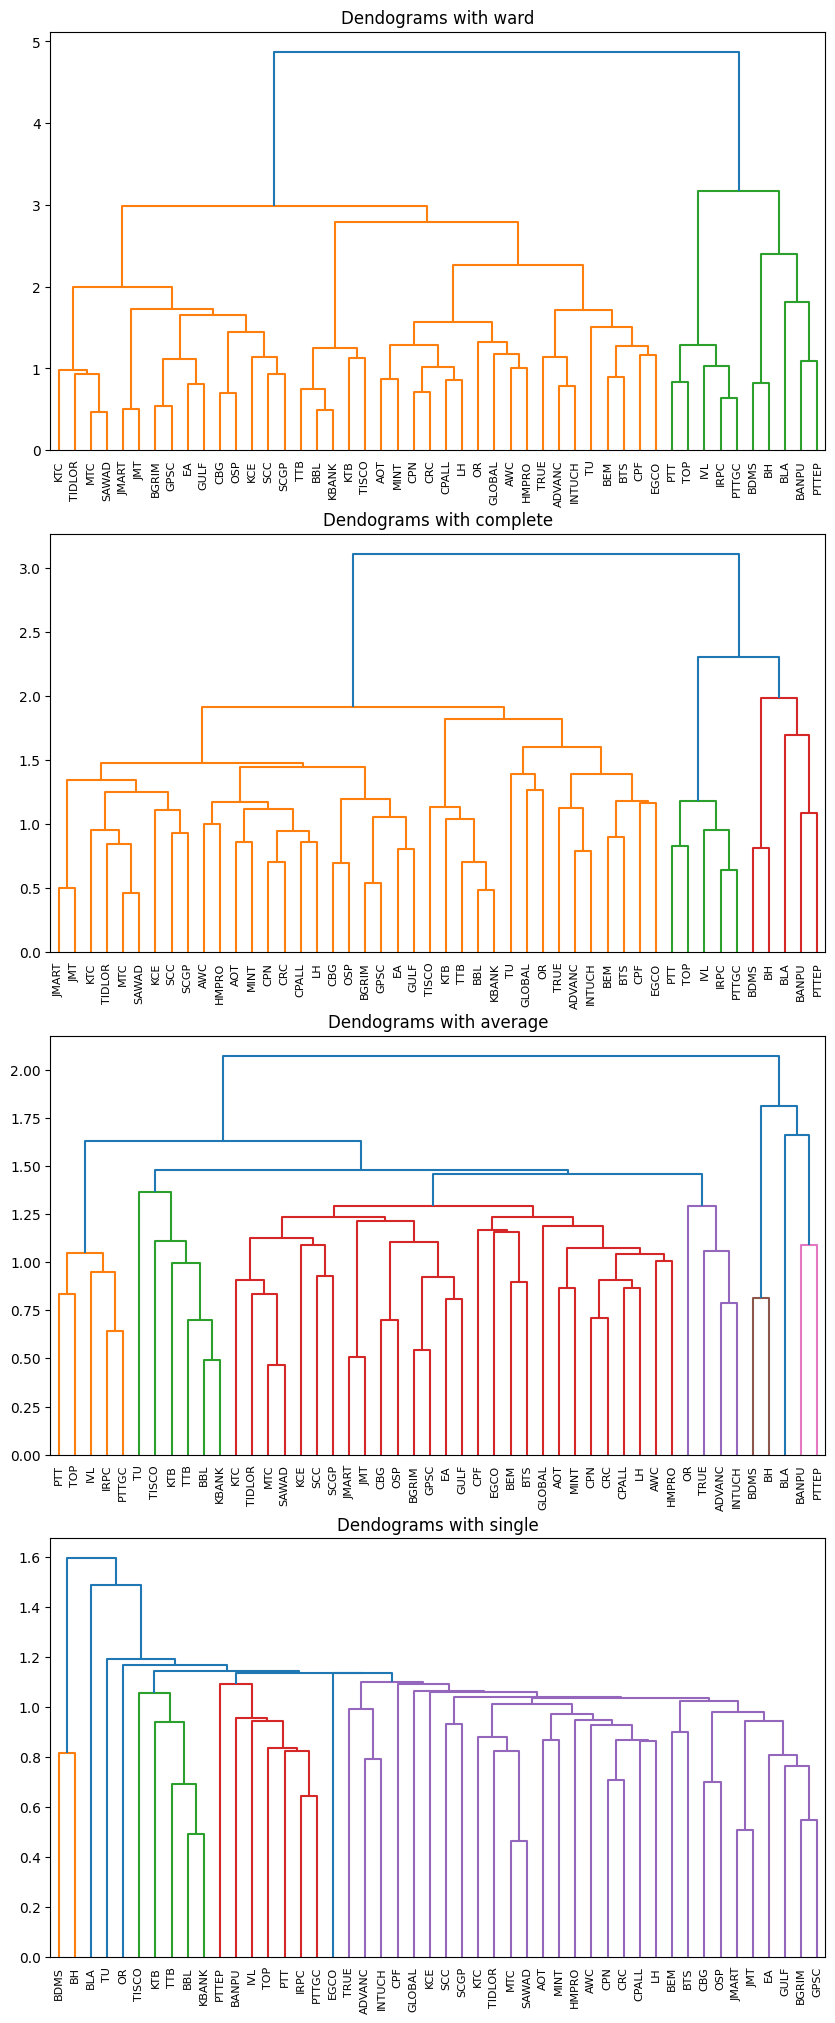

In [ ]:
import scipy.cluster.hierarchy as shc
fig, axes = plt.subplots(nrows=4,ncols=1, figsize=(10,25))
corr_condensed  = np.abs(1 - daily_rets2022.corr())# cosine distance function
for cnt, method in enumerate(["ward", "complete", "average", "single"]):
  z = shc.linkage(corr_condensed, method=method)
  dendrogram = shc.dendrogram(z, labels=corr_condensed.columns, ax=axes[cnt])
  axes[cnt].set_title(f"Dendograms with {method}")


## kmean algorithm

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(daily_rets2022.dropna().values.T)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [ ]:
for k in range(3):
  idx = np.nonzero(kmeans.labels_ == k)[0]
  txt = [daily_rets2022.columns[idk] for idk in idx]
  print(f"Cluster {k+1} contains {txt}.")


Cluster 1 contains ['JMART', 'JMT'].
Cluster 2 contains ['BANPU', 'IRPC', 'IVL', 'PTT', 'PTTEP', 'PTTGC', 'TOP'].
Cluster 3 contains ['ADVANC', 'AOT', 'AWC', 'BBL', 'BDMS', 'BEM', 'BGRIM', 'BH', 'BLA', 'BTS', 'CBG', 'CPALL', 'CPF', 'CPN', 'CRC', 'EA', 'EGCO', 'GLOBAL', 'GPSC', 'GULF', 'HMPRO', 'INTUCH', 'KBANK', 'KCE', 'KTB', 'KTC', 'LH', 'MINT', 'MTC', 'OR', 'OSP', 'SAWAD', 'SCC', 'SCGP', 'TIDLOR', 'TISCO', 'TRUE', 'TTB', 'TU'].
